# Sentiment Analysis

COMPANY:  CODTECH IT SOLUTIONS

NAME:  YAKKALA LAHARI

INTERN ID:  CT04DY2623

DOMAIN:  DATA ANALYTICS


## Import libraries

In [1]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

## Load Dataset

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Documents\twitter_training.csv')
print(df.head())

   number        place  category  \
0    2401  Borderlands  Positive   
1    2401  Borderlands  Positive   
2    2401  Borderlands  Positive   
3    2401  Borderlands  Positive   
4    2401  Borderlands  Positive   

                                               tweet  
0  I am coming to the borders and I will kill you...  
1  im getting on borderlands and i will kill you ...  
2  im coming on borderlands and i will murder you...  
3  im getting on borderlands 2 and i will murder ...  
4  im getting into borderlands and i can murder y...  


In [3]:
df.columns

Index(['number', 'place', 'category', 'tweet'], dtype='object')

## Data Cleaning & Preprocessing

In [4]:
print("Shape before cleaning:", df.shape)
print("---------------------------------")
print(df.info())

Shape before cleaning: (74681, 4)
---------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   number    74681 non-null  int64 
 1   place     74681 non-null  object
 2   category  74681 non-null  object
 3   tweet     73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [5]:
# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.dropna(inplace=True)

In [6]:
# Standardize column names (lowercase and remove spaces)
df.columns = df.columns.str.lower().str.strip()

print("Available columns:", df.columns)

text_col = df.columns[-1]

Available columns: Index(['number', 'place', 'category', 'tweet'], dtype='object')


In [7]:
# Clean text: remove URLs, mentions, hashtags, punctuations, digits, and extra spaces
import re
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df[text_col].apply(clean_text)


df = df[df['clean_text'].str.len() > 3]


print("Shape after cleaning:", df.shape)
print("---------------------------------")
print(df[['clean_text']].head(10))


Shape after cleaning: (69900, 5)
---------------------------------
                                          clean_text
0  i am coming to the borders and i will kill you...
1  im getting on borderlands and i will kill you all
2  im coming on borderlands and i will murder you...
3  im getting on borderlands and i will murder yo...
4  im getting into borderlands and i can murder y...
5  so i spent a few hours making something for fu...
6  so i spent a couple of hours doing something f...
7  so i spent a few hours doing something for fun...
8  so i spent a few hours making something for fu...
9  so i spent a few hours making something for fu...


In [8]:
from nltk.sentiment import SentimentIntensityAnalyzer

# Initialize Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

text_column = 'tweet'

# Compute Sentiment Scores
df['sentiment_score'] = df[text_column].fillna('').astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Classify Sentiment
def get_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['sentiment_score'].apply(get_sentiment)

print('\nSentiment Distribution:')
print(df['sentiment'].value_counts())



Sentiment Distribution:
sentiment
Positive    32110
Negative    26100
Neutral     11690
Name: count, dtype: int64


## Visualization

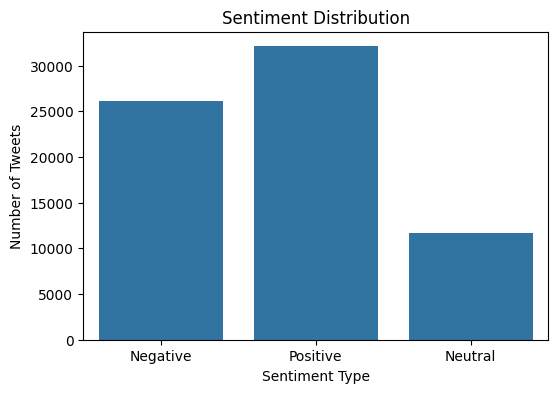

In [9]:
# Sentiment Count
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Tweets')
plt.show()

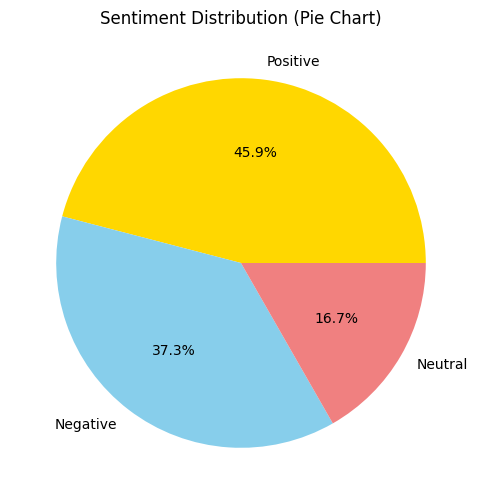

In [10]:
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['gold','skyblue','lightcoral'])
plt.title('Sentiment Distribution (Pie Chart)')
plt.ylabel('')
plt.show()

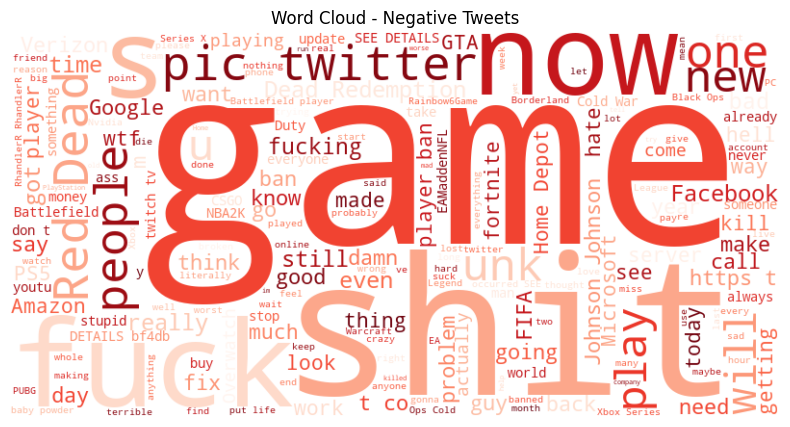

In [11]:
negative_text = ' '.join(df[df['sentiment'] == 'Negative']['tweet'].astype(str))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Negative Tweets')
plt.show()

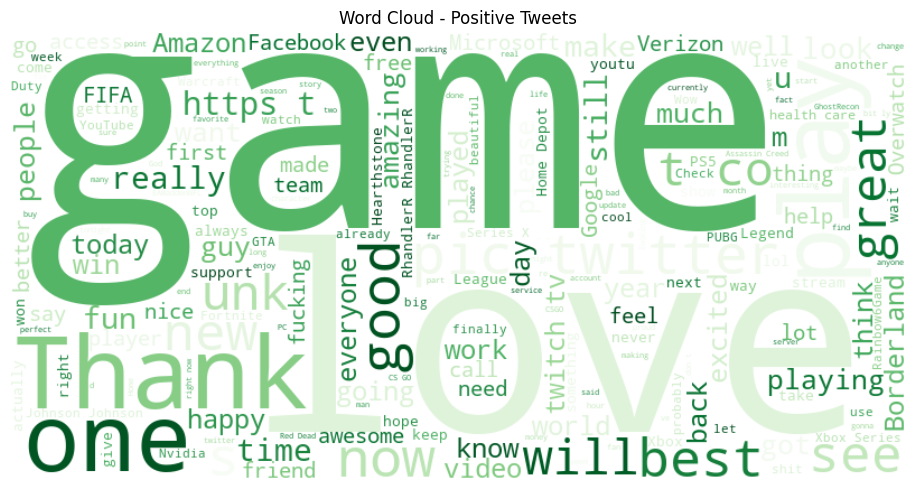

In [12]:
positive_text = ' '.join(df[df['sentiment'] == 'Positive'][text_column])
wordcloud_pos = WordCloud(width=800, height=400, 
                          background_color='white', colormap='Greens').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Tweets')
plt.tight_layout()
plt.show()

## Thank You